In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
df = df.drop(columns=['id', 'Unnamed: 32'])


In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [14]:
print(f"Features : {X.shape}")
print(f"Target : {y.shape}")
print(y.value_counts(normalize=True))


Features : (569, 30)
Target : (569,)
diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")


Training set shape: (455, 30)
Test set shape: (114, 30)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)']))

Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.97        72
Malignant (1)       0.97      0.93      0.95        42

     accuracy                           0.96       114
    macro avg       0.97      0.96      0.96       114
 weighted avg       0.97      0.96      0.96       114



In [24]:
precision_default = precision_score(y_test, y_pred)
recall_default = recall_score(y_test, y_pred)
f1_default = f1_score(y_test, y_pred)
roc_auc_default = roc_auc_score(y_test, y_pred_proba)
confusion_matrix_default = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")
print(f"F1-Score: {f1_default:.4f}")
print(f"ROC-AUC Score: {roc_auc_default:.4f}")
print(f"Confusion Matrix : \n{confusion_matrix_default}")

Precision: 0.9750
Recall: 0.9286
F1-Score: 0.9512
ROC-AUC Score: 0.9960
Confusion Matrix : 
[[71  1]
 [ 3 39]]


### CONFUSSION MATRIX

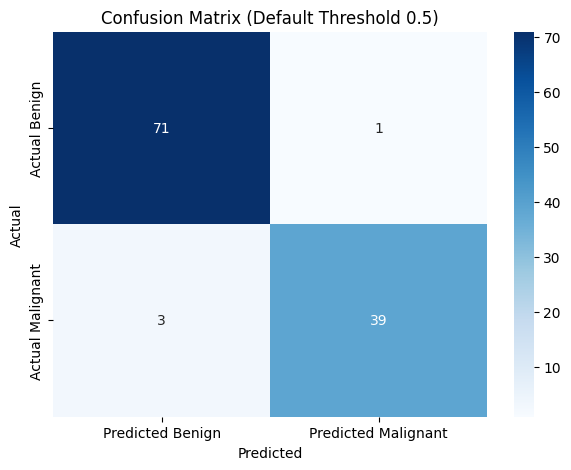

In [ ]:
from matplotlib import pyplot as plt
import seaborn as snshttps://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix (Default Threshold 0.5)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_default.png')
plt.show()

### ROC Curve

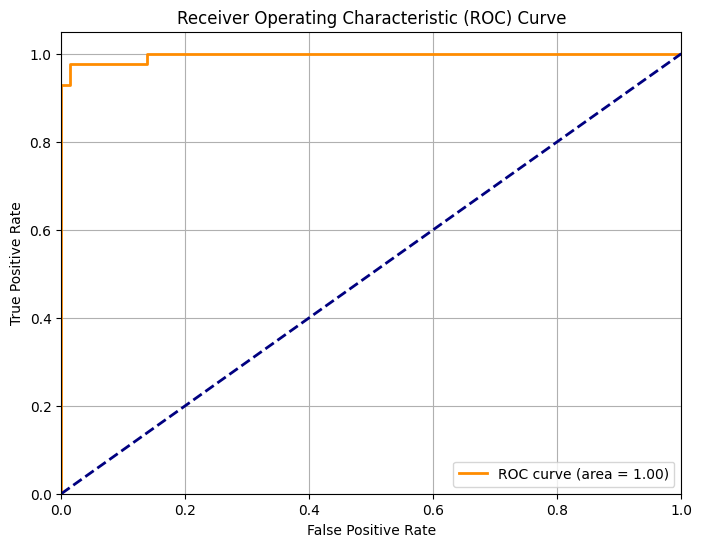

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_default:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()

### Tune Treshold

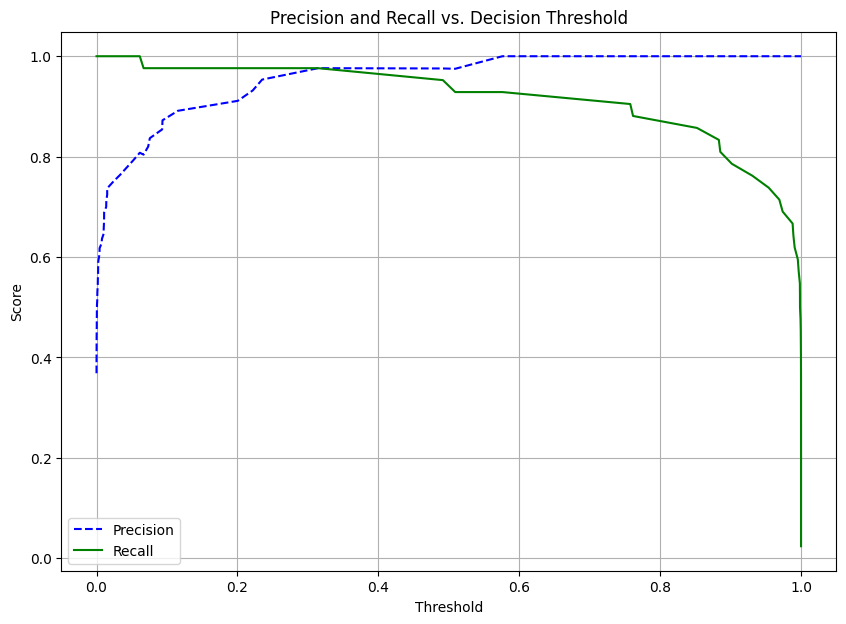

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_pr, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds_pr, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Decision Threshold")
plt.legend(loc="best")
plt.grid(True)
plt.savefig('precision_recall_vs_threshold.png')
plt.show()

In [28]:
import numpy as np
f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
f1_scores = np.nan_to_num(f1_scores, nan=0.0)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Max F1-Score: {f1_scores[optimal_idx]:.4f}")

Optimal Threshold: 0.3145
Max F1-Score: 0.9762


In [29]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal, target_names=['Benign (0)', 'Malignant (1)']))

               precision    recall  f1-score   support

   Benign (0)       0.99      0.99      0.99        72
Malignant (1)       0.98      0.98      0.98        42

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



### Key metrics with optimal threshold

In [30]:
precision_opt = precision_score(y_test, y_pred_optimal)
recall_opt = recall_score(y_test, y_pred_optimal)
f1_opt = f1_score(y_test, y_pred_optimal)

print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1-Score: {f1_opt:.4f}")

Precision: 0.9762
Recall: 0.9762
F1-Score: 0.9762


### Plot new Confusion Matrix

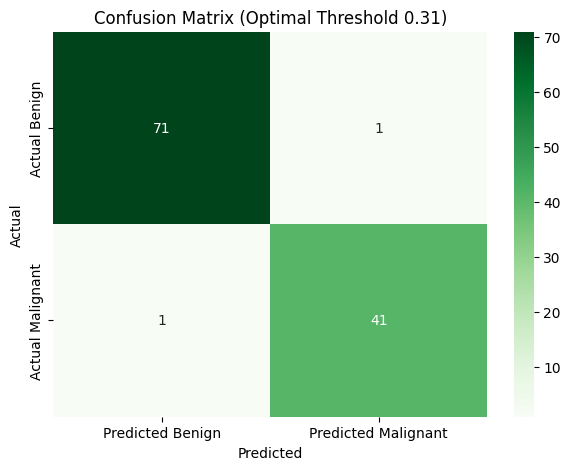

In [32]:
cm_opt = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_opt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title(f'Confusion Matrix (Optimal Threshold {optimal_threshold:.2f})')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('New_confusion_matrix_optimal.png')
plt.show()

### Simple Explaination of Sigmoid function
Logistic regression is named for its core function, the sigmoid (or logistic) function. This function takes any real-valued number and "squashes" it into a value between 0 and 1.

The formula is:
                $$S(z) = \frac{1}{1 + e^{-z}}$$


1. z is the linear combination of your features and the model's learned coefficients (e.g., $z = w_1x_1 + w_2x_2 + ... + b$).
2. The output, $S(z)$, is interpreted as the probability that a given sample belongs to the positive class (in our case, 'Malignant').
3. If $S(z) \ge 0.5$, the model predicts class 1.
4. If $S(z) < 0.5$, the model predicts class 0.
